##### Prim's:

- Prim's algorithm finds the Minimum Spanning Tree (MST) in a connected and undirected graph.

- The MST found by Prim's algorithm is the collection of edges in a graph, that connects all vertices, with a minimum sum of edge weights.

- Prim's algorithm finds the MST by first including a random vertex to the MST. The algorithm then finds the vertex with the lowest edge weight from the current MST, and includes that to the MST. Prim's algorithm keeps doing this until all nodes are included in the MST.

- Prim's algorithm is greedy, and has a straightforward way to create a minimum spanning tree.

- For Prim's algorithm to work, all the nodes must be connected. To find the MST's in an unconnected graph, Kruskal's algorithm can be used instead. You can read about Kruskal's algorithm on the next page.


In [1]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def prims_algorithm(self):
        in_mst = [False] * self.size
        key_values = [float('inf')] * self.size
        parents = [-1] * self.size

        key_values[0] = 0  # Starting vertex

        print("Edge \tWeight")
        for _ in range(self.size):
            u = min((v for v in range(self.size) if not in_mst[v]), key=lambda v: key_values[v])

            in_mst[u] = True

            if parents[u] != -1:  # Skip printing for the first vertex since it has no parent
                print(f"{self.vertex_data[parents[u]]}-{self.vertex_data[u]} \t{self.adj_matrix[u][parents[u]]}")

            for v in range(self.size):
                if 0 < self.adj_matrix[u][v] < key_values[v] and not in_mst[v]:
                    key_values[v] = self.adj_matrix[u][v]
                    parents[v] = u

g = Graph(8)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')
g.add_vertex_data(7, 'H')

g.add_edge(0, 1, 4)  # A - B
g.add_edge(0, 3, 3)  # A - D
g.add_edge(1, 2, 3)  # B - C
g.add_edge(1, 3, 5)  # B - D
g.add_edge(1, 4, 6)  # B - E
g.add_edge(2, 4, 4)  # C - E
g.add_edge(2, 7, 2)  # C - H
g.add_edge(3, 4, 7)  # D - E
g.add_edge(3, 5, 4)  # D - F
g.add_edge(4, 5, 5)  # E - F
g.add_edge(4, 6, 3)  # E - G
g.add_edge(5, 6, 7)  # F - G
g.add_edge(6, 7, 5)  # G - H

print("Prim's Algorithm MST:")
g.prims_algorithm()

Prim's Algorithm MST:
Edge 	Weight
A-D 	3
A-B 	4
B-C 	3
C-H 	2
C-E 	4
E-G 	3
D-F 	4


##### Introduction to Prim’s algorithm:

We have discussed Kruskal’s algorithm for Minimum Spanning Tree. Like Kruskal’s algorithm, Prim’s algorithm is also a Greedy algorithm. This algorithm always starts with a single node and moves through several adjacent nodes, in order to explore all of the connected edges along the way.

The algorithm starts with an empty spanning tree. The idea is to maintain two sets of vertices. The first set contains the vertices already included in the MST, and the other set contains the vertices not yet included. At every step, it considers all the edges that connect the two sets and picks the minimum weight edge from these edges. After picking the edge, it moves the other endpoint of the edge to the set containing MST. 

A group of edges that connects two sets of vertices in a graph is called cut in graph theory. So, at every step of Prim’s algorithm, find a cut, pick the minimum weight edge from the cut, and include this vertex in MST Set (the set that contains already included vertices).

#####  How does Prim’s Algorithm Work? 

The working of Prim’s algorithm can be described by using the following steps:

- Step 1: Determine an arbitrary vertex as the starting vertex of the MST.

- Step 2: Follow steps 3 to 5 till there are vertices that are not included in the MST (known as fringe vertex).

- Step 3: Find edges connecting any tree vertex with the fringe vertices.

- Step 4: Find the minimum among these edges.

- Step 5: Add the chosen edge to the MST if it does not form any cycle.

- Step 6: Return the MST and exit

Note: 

For determining a cycle, we can divide the vertices into two sets [one set contains the vertices included in MST and the other contains the fringe vertices.]


#### Illustration of Prim’s Algorithm:

Consider the following graph as an example for which we need to find the Minimum Spanning Tree (MST).


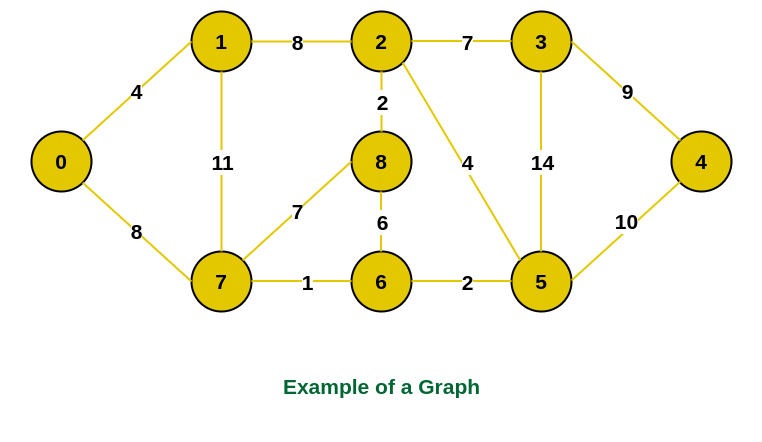

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p1.png")

Step 1: Firstly, we select an arbitrary vertex that acts as the starting vertex of the Minimum Spanning Tree. Here we have selected vertex 0 as the starting vertex.

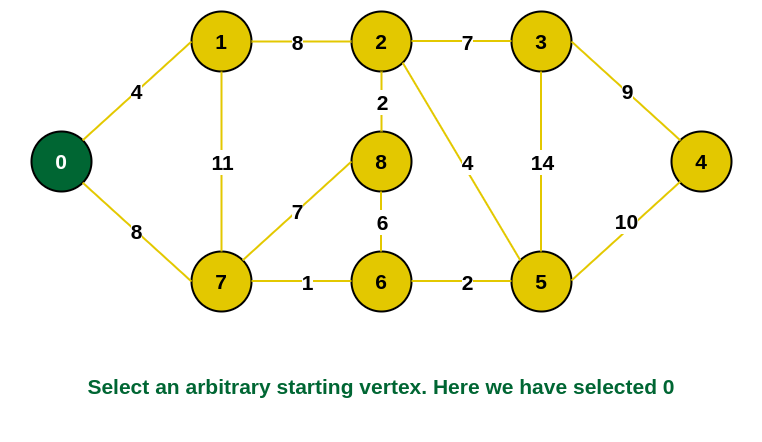

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p2.png")

Step 2: All the edges connecting the incomplete MST and other vertices are the edges {0, 1} and {0, 7}. Between these two the edge with minimum weight is {0, 1}. So include the edge and vertex 1 in the MST.



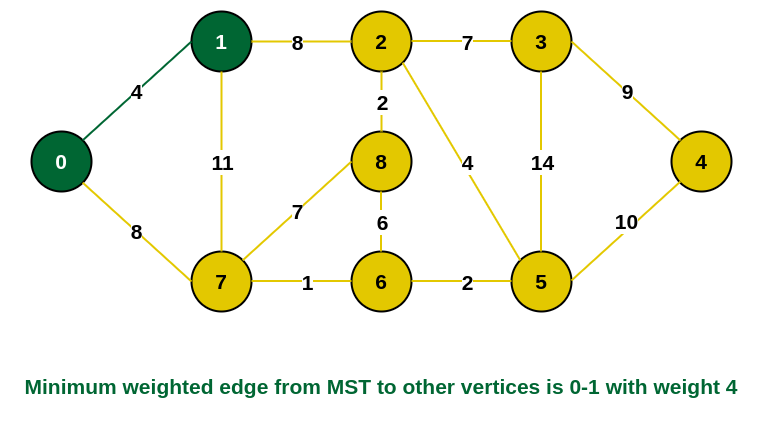

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p3.png")

 Step 3: The edges connecting the incomplete MST to other vertices are {0, 7}, {1, 7} and {1, 2}. Among these edges the minimum weight is 8 which is of the edges {0, 7} and {1, 2}. Let us here include the edge {0, 7} and the vertex 7 in the MST. [We could have also included edge {1, 2} and vertex 2 in the MST]. 

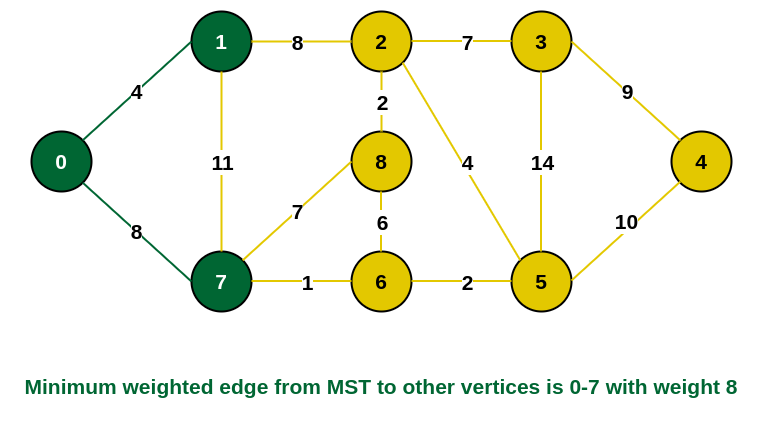

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p4.png")

Step 4: The edges that connect the incomplete MST with the fringe vertices are {1, 2}, {7, 6} and {7, 8}. Add the edge {7, 6} and the vertex 6 in the MST as it has the least weight (i.e., 1).



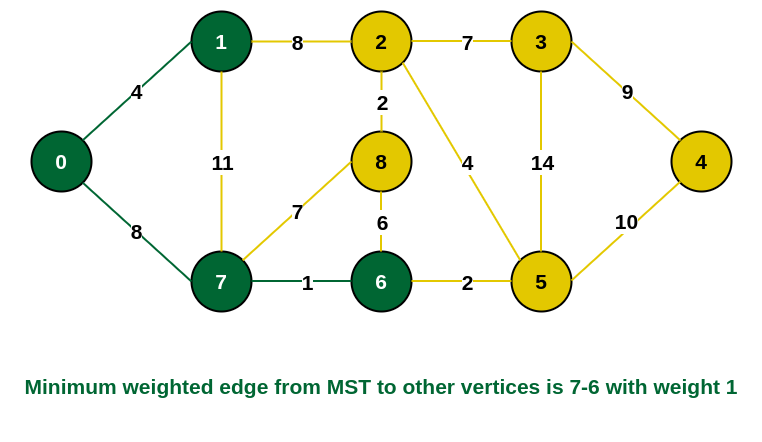

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p5.png")

Step 5: The connecting edges now are {7, 8}, {1, 2}, {6, 8} and {6, 5}. Include edge {6, 5} and vertex 5 in the MST as the edge has the minimum weight (i.e., 2) among them.



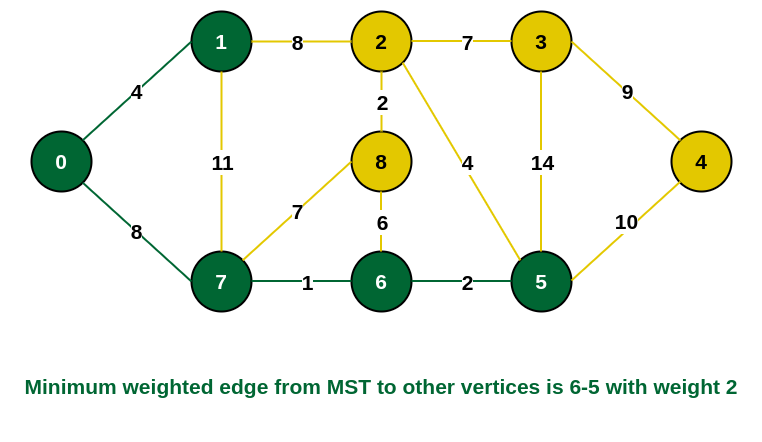

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p6.png")

Step 6: Among the current connecting edges, the edge {5, 2} has the minimum weight. So include that edge and the vertex 2 in the MST.



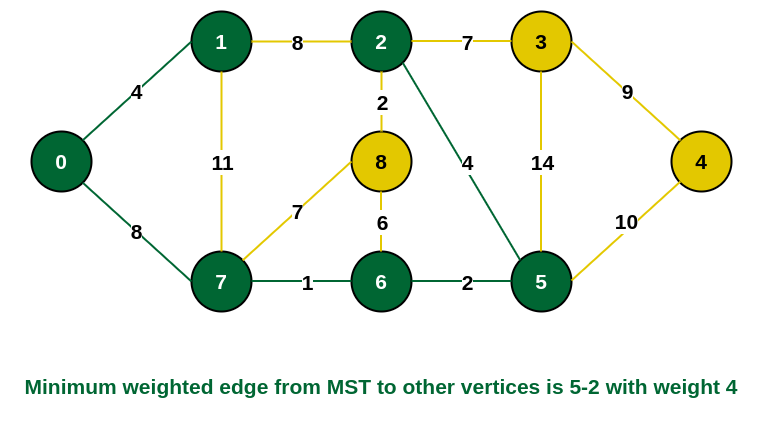

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p7.png")

Step 7: The connecting edges between the incomplete MST and the other edges are {2, 8}, {2, 3}, {5, 3} and {5, 4}. The edge with minimum weight is edge {2, 8} which has weight 2. So include this edge and the vertex 8 in the MST.



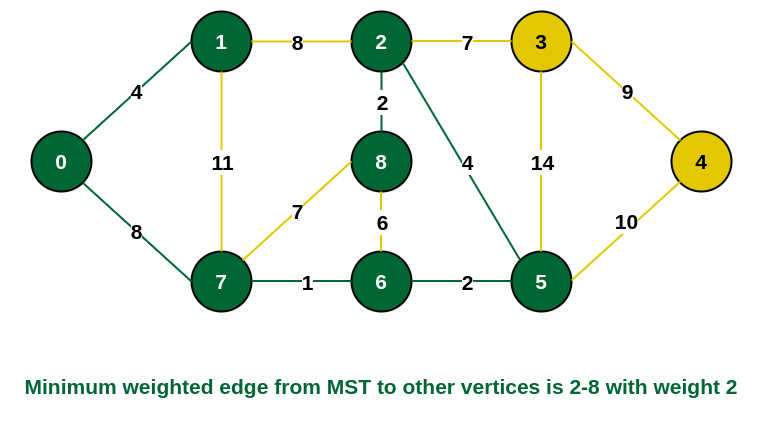

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p8.png")

Step 8: See here that the edges {7, 8} and {2, 3} both have same weight which are minimum. But 7 is already part of MST. So we will consider the edge {2, 3} and include that edge and vertex 3 in the MST.



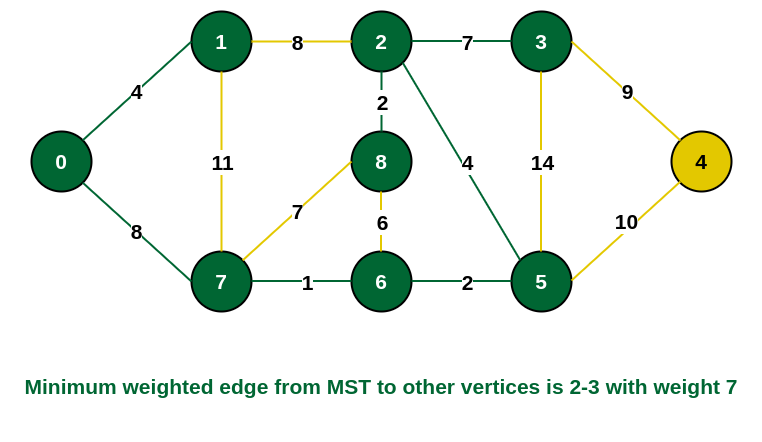

In [11]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p9.png")

Step 9: Only  the vertex 4 remains to be included. The minimum weighted edge from the incomplete MST to 4 is {3, 4}.



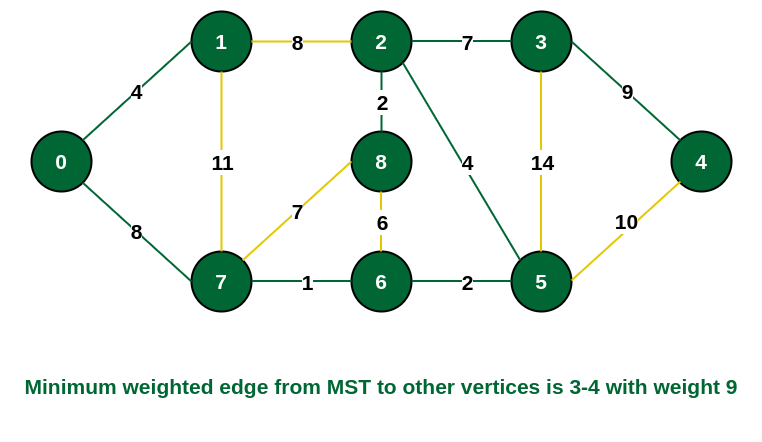

In [12]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p10.png")

The final structure of the MST is as follows and the weight of the edges of the MST is (4 + 8 + 1 + 2 + 4 + 2 + 7 + 9) = 37.



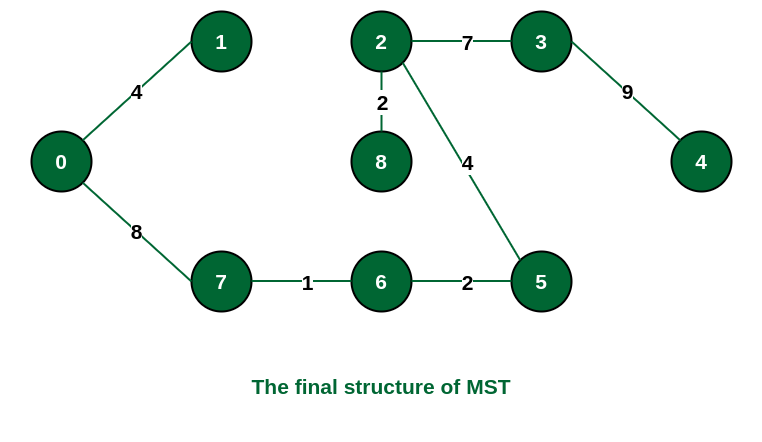

In [13]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p11.png")

Note: If we had selected the edge {1, 2} in the third step then the MST would look like the following.



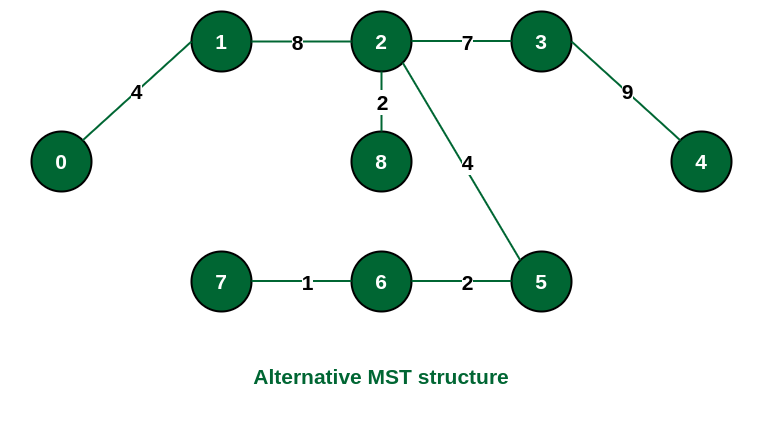

In [14]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/p12.png")

##### How to implement Prim’s Algorithm?

Follow the given steps to utilize the Prim’s Algorithm mentioned above for finding MST of a graph:

- Create a set mstSet that keeps track of vertices already included in MST. 

- Assign a key value to all vertices in the input graph. Initialize all key values as INFINITE. Assign the key value as 0 for the first vertex so that it is picked first. 

- While mstSet doesn’t include all vertices 

    - Pick a vertex u that is not there in mstSet and has a minimum key value. 

    - Include u in the mstSet. 

    - Update the key value of all adjacent vertices of u. To update the key values, iterate through all adjacent vertices. 

        - For every adjacent vertex v, if the weight of edge u-v is less than the previous key value of v, update the key value as the weight of u-v.
        
The idea of using key values is to pick the minimum weight edge from the cut. The key values are used only for vertices that are not yet included in MST, the key value for these vertices indicates the minimum weight edges connecting them to the set of vertices included in MST.

In [1]:
import sys

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def minKey(self, key, mstSet):
        min = sys.maxsize
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index

    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V 
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False \
                and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        self.printMST(parent)

if __name__ == '__main__':
    g = Graph(5)
    g.graph = [[0, 2, 0, 6, 0],
               [2, 0, 3, 8, 5],
               [0, 3, 0, 0, 7],
               [6, 8, 0, 0, 9],
               [0, 5, 7, 9, 0]]

    g.primMST()

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


##### Time Complexity: O(V2)

If the input graph is represented using an adjacency list, then the time complexity of Prim’s algorithm can be reduced to O(E * logV) with the help of a binary heap.  In this implementation, we are always considering the spanning tree to start from the root of the graph

##### Auxiliary Space: O(V)

#### Optimized Implementation using Adjacency List Representation (of Graph) and Priority Queue

Intuition

- We transform the adjacency matrix into adjacency list using ArrayList<ArrayList<Integer>>. in Java, list of list in Python
and array of vectors in C++.

- Then we create a Pair class to store the vertex and its weight .

- We sort the list on the basis of lowest weight.

- We create priority queue and push the first vertex and its weight in the queue

- Then we just traverse through its edges and store the least weight in a variable called ans.

- At last after all the vertex we return the ans.

##### Time Complexity: O(E*log(E)) where E is the number of edges
##### Auxiliary Space: O(V^2) where V is the number of vertex

Prim’s algorithm for finding the minimum spanning tree (MST):

##### Advantages:

- Prim’s algorithm is guaranteed to find the MST in a connected, weighted graph.

- It has a time complexity of O(E log V) using a binary heap or Fibonacci heap, where E is the number of edges and V is the number of vertices.

- It is a relatively simple algorithm to understand and implement compared to some other MST algorithms.

##### Disadvantages:

- Like Kruskal’s algorithm, Prim’s algorithm can be slow on dense graphs with many edges, as it requires iterating over all edges at least once.

- Prim’s algorithm relies on a priority queue, which can take up extra memory and slow down the algorithm on very large graphs.

- The choice of starting node can affect the MST output, which may not be desirable in some applications.

- Other Implementations of Prim’s Algorithm:

##### Given below are some other implementations of Prim’s Algorithm

- Prim’s Algorithm for Adjacency Matrix Representation – In this article we have discussed the method of implementing Prim’s Algorithm if the graph is represented by an adjacency matrix.

- Prim’s Algorithm for Adjacency List Representation – In this article Prim’s Algorithm implementation is described for graphs represented by an adjacency list.

- Prim’s Algorithm using Priority Queue: In this article, we have discussed a time-efficient approach to implement Prim’s algorithm.